In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import seaborn as sns

Step 0: load our data

In [ ]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MSc thesis/processed_data/metadata/fully_concatenated_data.csv", lineterminator='\n')

In [ ]:
data.iloc[:, 1:35]

,Username,post_id,comments_disabled,image_height,image_width,like_count,comment_count,is_video,taken_at_timestamp,caption,...,Year,Month,Day,Hour,Day of Week (Number),Day of Week (String),Is_English,Detected_Language,Image_Count,image_0
0,00_rocketgirl,1354915397698488656,False,1350,1080,293,6,False,1475738523,Preseason game 2 outfit.Vintage hat (which I t...,...,2016,10,6,7,3,Thursday,True,en,1,0.483804
1,00_rocketgirl,1666974101448132749,False,480,480,73,2,False,1512938820,Took Heidi to meet Santa today at @petsmart. S...,...,2017,12,10,20,6,Sunday,True,en,1,1.257535
2,00_rocketgirl,1768273356099895999,False,1080,1080,164,4,False,1525014632,4/18/18- Game 2 Rockets vs Wolves. Light up ha...,...,2018,4,29,15,6,Sunday,True,en,1,1.015909
3,00_rocketgirl,1770557472379860655,False,1350,1080,474,18,False,1525286920,4/18/18- Game 2 vs T-Wolves pics. Section 107 ...,...,2018,5,2,18,2,Wednesday,True,en,7,0.612580
4,00_rocketgirl,1899586748141399903,False,1350,1080,116,2,False,1540668408,Season opener outfit. The left is kind of what...,...,2018,10,27,19,5,Saturday,True,en,1,0.961807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196174,zwithlove,1689162745453535364,False,1342,1080,116,8,False,1515583912,Making 2018 my epic skin year. I’ve locked dow...,...,2018,1,10,11,2,Wednesday,True,en,2,0.160993
196175,zwithlove,1695128267039160652,False,1350,1080,127,3,False,1516295058,The perfect storm ☁️ wearing @boohoo rib knit ...,...,2018,1,18,17,3,Thursday,True,en,1,0.337574
196176,zwithlove,1926097425697935397,False,1350,1080,196,24,False,1543828727,"Of all the Christmas movies, I relate to the G...",...,2018,12,3,9,0,Monday,True,en,1,0.860733
196177,zy.interior,1717335338709878476,False,1350,1080,945,94,False,1518942347,Werbung\nGuten Morgen ihr Lieben. Ich gehe mal...,...,2018,2,18,8,6,Sunday,False,de,1,0.039804


11747


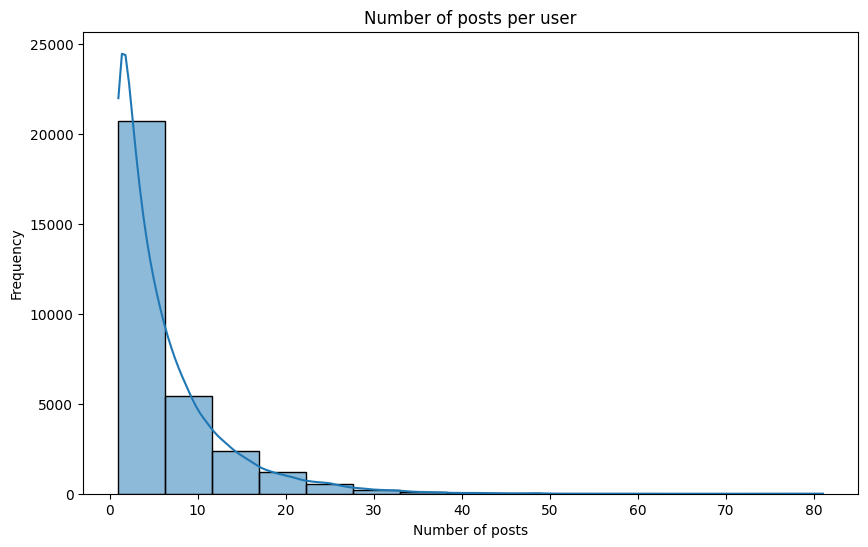

In [ ]:
user_posts_count = data.groupby('Username')['post_id'].nunique()
print(sum(user_posts_count >= 4))


plt.figure(figsize=(10, 6))
sns.histplot(user_posts_count, bins=15, kde=True)
plt.title('Number of posts per user')
plt.xlabel('Number of posts')
plt.ylabel('Frequency')
plt.show()